In [58]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate, accuracy

In [63]:
input_dir = "C:\\Users\\91958\\devnagari\\"
df = pd.read_csv(input_dir+"data.csv")

In [3]:
df.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


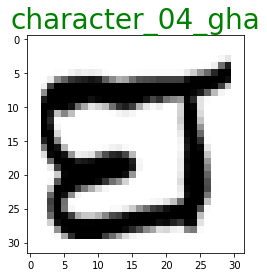

In [4]:
random_value = np.random.randint(len(df['character']))
X = df.iloc[random_value, :-1].values.astype("int").reshape(32, 32)
plt.title(str(df['character'][random_value]), color="green", fontsize=28)
plt.imshow(X, cmap="binary")

In [5]:
df.shape

(92000, 1025)

In [4]:
targets_numpy = df.character.values
features_numpy = df.iloc[:, :-1].values/255.0

In [5]:
targets_numpy

array(['character_01_ka', 'character_01_ka', 'character_01_ka', 'character_01_ka', ..., 'digit_9', 'digit_9',
       'digit_9', 'digit_9'], dtype=object)

In [6]:
features_numpy

array([[0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.]])

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



le = LabelEncoder()
targets_encoded = le.fit_transform(targets_numpy)
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy, targets_encoded, test_size=0.2, random_state=123)

In [8]:
targets_encoded

array([ 0,  0,  0,  0, ..., 45, 45, 45, 45])

In [9]:
features_train, features_test, targets_train, targets_test = map(torch.tensor, (features_train, features_test, targets_train, targets_test))

In [10]:
features_train.type()

'torch.DoubleTensor'

In [11]:
a=targets_train.type(torch.LongTensor)

In [12]:
features_test.type()

'torch.DoubleTensor'

In [13]:
b=targets_test.type(torch.LongTensor)

In [14]:
b.type()

'torch.LongTensor'

In [15]:

features_train.shape

torch.Size([73600, 1024])

In [16]:
bs=64
train_ds = TensorDataset(features_train, a)
valid_ds = TensorDataset(features_test, b)
data = DataBunch.create(train_ds, valid_ds, bs=bs)

In [31]:
# x,y = next(iter(data.train_dl))
# x=x.type(torch.cuda.FloatTensor); y=y.type(torch.cuda.FloatTensor)

In [36]:
# class mnist_NN(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.lin1 = nn.Linear(1024, 128, bias=True)
#         self.lin2 = nn.Linear(128, 46, bias=True)

#     def forward(self, xb):
#         x = self.lin1(xb)
#         x = F.relu(x)
#         return self.lin2(x)



# def update(x,y,lr):
#     opt = optim.Adam(mnist_model.parameters(), lr)
#     y_hat = mnist_model(x.float())
#     loss = loss_func(y_hat, y.long())
#     loss.backward()
#     opt.step()
#     opt.zero_grad()
#     return loss.item()

In [37]:
# mnist_model = Mnist_NN().cuda()


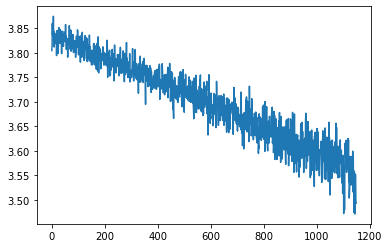

In [38]:
# lr=1e-05
# losses1 = [update(x,y,lr) for x,y in data.train_dl]

# plt.plot(losses1)

In [85]:
class dev_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(1024, 512, bias=True)
        self.lin2 = nn.Linear(512, 128, bias=True)
        self.lin3 = nn.Linear(128, 84, bias=True)
        self.lin4 = nn.Linear(84, 46, bias=True)
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, xb):
        x = self.lin1(xb)
        x = F.relu(x)
        x= self.dropout(x)
        x = self.lin2(x)
        x = F.relu(x)
        x= self.dropout(x)
        x = self.lin3(x)
        x = F.relu(x)
        x= self.dropout(x)
        
        return self.lin4(x)



def update(x,y,lr):
    opt = optim.Adam(dev_model.parameters(), lr)
    y_hat = dev_model(x)
    loss = loss_func(y_hat, y)
    loss.backward()
    opt.step()
    opt.zero_grad()
    return loss.item()

In [86]:
dev_model = dev_NN().cuda()

In [87]:
learn = Learner(data, dev_NN().to(torch.double), loss_func = nn.CrossEntropyLoss(), metrics= accuracy)

In [88]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


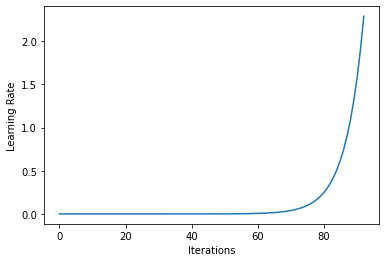

In [89]:
learn.recorder.plot_lr()

In [90]:
learn.fit_one_cycle(2, 1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,1.623254,1.171239,0.676467,00:24
1,0.856402,0.621908,0.826359,00:24


In [74]:
learn.save('dev_nn1')

In [75]:
learn.load('dev_nn1')

Learner(data=DataBunch;

Train: <torch.utils.data.dataset.TensorDataset object at 0x0000020878BC1C88>;

Valid: <torch.utils.data.dataset.TensorDataset object at 0x0000020878BC1C48>;

Test: None, model=dev_NN(
  (lin1): Linear(in_features=1024, out_features=128, bias=True)
  (lin2): Linear(in_features=128, out_features=46, bias=True)
), opt_func=functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99)), loss_func=CrossEntropyLoss(), metrics=[<function accuracy at 0x000002085B4798B8>], true_wd=True, bn_wd=True, wd=0.01, train_bn=True, path=WindowsPath('.'), model_dir='models', callback_fns=[functools.partial(<class 'fastai.basic_train.Recorder'>, add_time=True, silent=False)], callbacks=[], layer_groups=[Sequential(
  (0): Linear(in_features=1024, out_features=128, bias=True)
  (1): Linear(in_features=128, out_features=46, bias=True)
)], add_time=True, silent=False)

In [76]:
learn.unfreeze()

In [77]:
learn.fit_one_cycle(5, 1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,0.570595,0.636562,0.828152,00:13
1,0.724217,0.807186,0.794185,00:15
2,0.499226,0.623670,0.850870,00:15
3,0.302937,0.420507,0.898424,00:16
4,0.141905,0.369883,0.910380,00:15


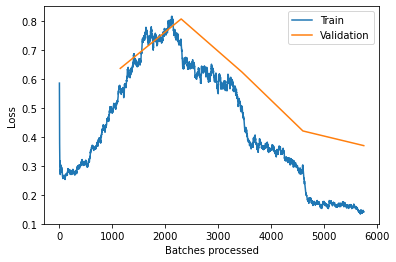

In [78]:
learn.recorder.plot_losses()

In [79]:
learn.save('dev_nn2')

In [80]:
learn.load('dev_nn2')

Learner(data=DataBunch;

Train: <torch.utils.data.dataset.TensorDataset object at 0x0000020878BC1C88>;

Valid: <torch.utils.data.dataset.TensorDataset object at 0x0000020878BC1C48>;

Test: None, model=dev_NN(
  (lin1): Linear(in_features=1024, out_features=128, bias=True)
  (lin2): Linear(in_features=128, out_features=46, bias=True)
), opt_func=functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99)), loss_func=CrossEntropyLoss(), metrics=[<function accuracy at 0x000002085B4798B8>], true_wd=True, bn_wd=True, wd=0.01, train_bn=True, path=WindowsPath('.'), model_dir='models', callback_fns=[functools.partial(<class 'fastai.basic_train.Recorder'>, add_time=True, silent=False)], callbacks=[], layer_groups=[Sequential(
  (0): Linear(in_features=1024, out_features=128, bias=True)
  (1): Linear(in_features=128, out_features=46, bias=True)
)], add_time=True, silent=False)

In [82]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


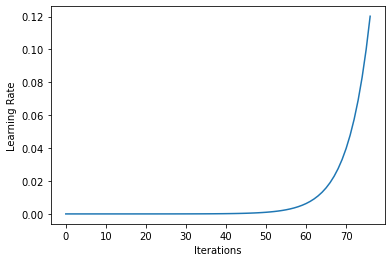

In [83]:
learn.recorder.plot_lr()

In [84]:
learn.fit_one_cycle(15, 1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,0.154354,0.394477,0.905326,00:20
1,0.288866,0.507216,0.880217,00:20
2,0.497720,0.682269,0.843152,00:20
3,0.599365,0.807893,0.824076,00:20
4,0.647968,0.743881,0.834511,00:21
5,0.642673,0.832774,0.828043,00:21
6,0.582958,0.746886,0.840978,00:20
7,0.447690,0.697166,0.855707,00:20
8,0.378054,0.582862,0.873424,00:20
9,0.305663,0.540453,0.888098,00:20


In [91]:
learn1 = Learner(data, dev_NN().to(torch.double), loss_func = nn.CrossEntropyLoss(), metrics= accuracy)

In [92]:
learn1.fit_one_cycle(5, 1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,1.405669,1.144133,0.661250,00:25
1,1.794956,1.355789,0.623315,00:24
2,1.310577,0.960194,0.739348,00:26
3,0.944339,0.609856,0.832065,00:24
4,0.741331,0.516625,0.856522,00:24


In [93]:
learn1.save('dev_nn_modified')

In [94]:
learn1.load('dev_nn_modified')

Learner(data=DataBunch;

Train: <torch.utils.data.dataset.TensorDataset object at 0x0000020878BC1C88>;

Valid: <torch.utils.data.dataset.TensorDataset object at 0x0000020878BC1C48>;

Test: None, model=dev_NN(
  (lin1): Linear(in_features=1024, out_features=512, bias=True)
  (lin2): Linear(in_features=512, out_features=128, bias=True)
  (lin3): Linear(in_features=128, out_features=84, bias=True)
  (lin4): Linear(in_features=84, out_features=46, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
), opt_func=functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99)), loss_func=CrossEntropyLoss(), metrics=[<function accuracy at 0x000002085B4798B8>], true_wd=True, bn_wd=True, wd=0.01, train_bn=True, path=WindowsPath('.'), model_dir='models', callback_fns=[functools.partial(<class 'fastai.basic_train.Recorder'>, add_time=True, silent=False)], callbacks=[], layer_groups=[Sequential(
  (0): Linear(in_features=1024, out_features=512, bias=True)
  (1): Linear(in_features=512, out_f

In [95]:
learn1.unfreeze()

In [96]:
learn1.fit_one_cycle(25,  1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,0.695198,0.501536,0.863098,00:24
1,0.740192,0.495207,0.869022,00:26
2,0.783413,0.545521,0.851902,00:27
3,0.977804,0.688906,0.820815,00:24
4,1.307287,0.823197,0.788641,00:25
5,1.513943,0.998193,0.740489,00:24
6,1.794294,1.185818,0.713750,00:26
7,1.684701,1.086946,0.717826,00:25
8,1.747939,1.227603,0.689783,00:23
9,1.803656,1.178261,0.702826,00:26


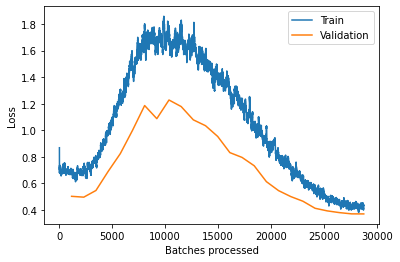

In [97]:
learn1.recorder.plot_losses()

In [98]:
learn1.save('dev_nn_modified1')

In [25]:
#####################  want to Use resnet34 with fastai ########################

In [17]:
features_train.shape, 

targets_train.min(),
targets_train.max()

(torch.Size([73600, 1024]),
 tensor(0, dtype=torch.int32),
 tensor(45, dtype=torch.int32))

In [108]:
 features_test.shape


torch.Size([18400, 1024])

torch.Size([73600, 32, 32, 1])


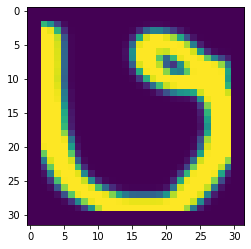

In [42]:
##### train set


X_train_img = features_train.reshape([73600,32,32,1])
print (X_train_img.shape)

def imshow(ix):
    plt.imshow(np.squeeze(X_train_img[ix,:,:,0:1])) 
    plt.show()
    
imshow(3)     

torch.Size([18400, 32, 32, 1])


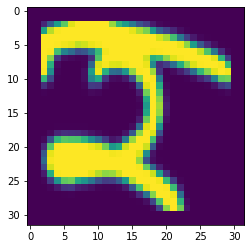

In [43]:
####### test set

X_test_img = features_test.reshape([18400,32,32,1])
print (X_test_img.shape)

def imshow(ix):
    plt.imshow(np.squeeze(X_test_img[ix,:,:,0:1])) 
    plt.show()
    
imshow(1024) 

In [119]:
X_train_img[2].shape

torch.Size([32, 32, 1])

In [33]:
a.shape, b.shape                    #### these are y_train and y_test  (labels)

(torch.Size([73600]), torch.Size([18400]))

In [ ]:
# train = TensorDataset(X_train_img, a)
# valid = TensorDataset(X_test_img, b)
# data = DataBunch.create(train_dl = train, valid_dl = valid)

In [78]:
class MyDataset():
    def __init__(self ,x_train_img , y_train, c):

        self.y_train = y_train
        self.X_train = x_train_img
        self.c = c

    def __getitem__(self,idx):
        label = self.y_train[idx]

        image = Image.fromarray((np.squeeze(self.x_train_img[idx,:,:,0:3]))).convert('RGB')
        
        return image, label
    
    def __len__(self):
        return len(self.y_train)

    
    
c = df['character'].unique()
print(c)
dataset = MyDataset(X_train_img, a, c) 






from torch.utils.data import Dataset, DataLoader ,random_split
valid_no = int(len(dataset)*0.2) 
trainset ,valset  = random_split( dataset , [len(dataset) -valid_no  ,valid_no])

print(len(trainset), len(valset))

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=0)
validloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True, num_workers=0)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")





['character_01_ka' 'character_02_kha' 'character_03_ga' 'character_04_gha' 'character_05_kna' 'character_06_cha'
 'character_07_chha' 'character_08_ja' 'character_09_jha' 'character_10_yna' 'character_11_taamatar'
 'character_12_thaa' 'character_13_daa' 'character_14_dhaa' 'character_15_adna' 'character_16_tabala'
 'character_17_tha' 'character_18_da' 'character_19_dha' 'character_20_na' 'character_21_pa' 'character_22_pha'
 'character_23_ba' 'character_24_bha' 'character_25_ma' 'character_26_yaw' 'character_27_ra' 'character_28_la'
 'character_29_waw' 'character_30_motosaw' 'character_31_petchiryakha' 'character_32_patalosaw' 'character_33_ha'
 'character_34_chhya' 'character_35_tra' 'character_36_gya' 'digit_0' 'digit_1' 'digit_2' 'digit_3' 'digit_4' 'digit_5'
 'digit_6' 'digit_7' 'digit_8' 'digit_9']
58880 14720


In [79]:
data = DataBunch.create(train_ds = trainloader, valid_ds = validloader)

In [80]:
data.c

AttributeError: 'Subset' object has no attribute 'c'

In [53]:
learn2 = cnn_learner(data, models.resnet34, metrics=accuracy)

AttributeError: 'Subset' object has no attribute 'c'